In [60]:
import numpy as np
import pandas as pd

In [61]:
df=pd.read_csv('spam_cleaned.csv',encoding='latin-1')

In [65]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ABISHEK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABISHEK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
def func(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    # return text
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if ((i not in (stopwords.words('english'))) and (i not in (string.punctuation))):
            y.append(ps.stem(i))
    return " ".join(y)

In [73]:
df['text_transformed']=df['text'].apply(func)

In [74]:
df

,target,text,num_characters,num_words,num_sentences,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5165,0,Will Ã_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5166,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5167,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [75]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df.target==1]['text_transformed'].str.cat(sep=" "))


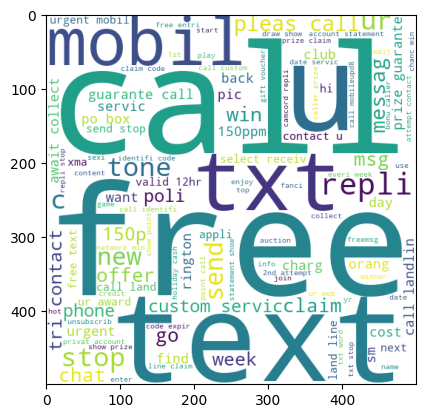

In [76]:
import matplotlib.pyplot as plt
plt.imshow(spam_wc)

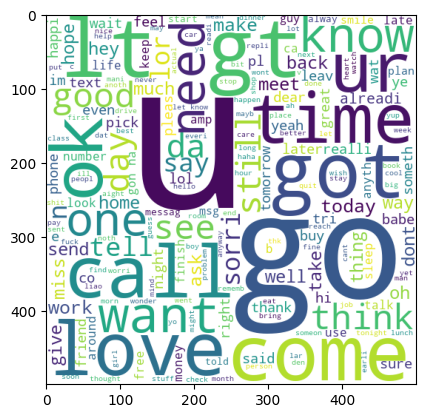

In [77]:
ham_wc=wc.generate(df[df.target==0]['text_transformed'].str.cat(sep=" "))
plt.imshow(ham_wc)

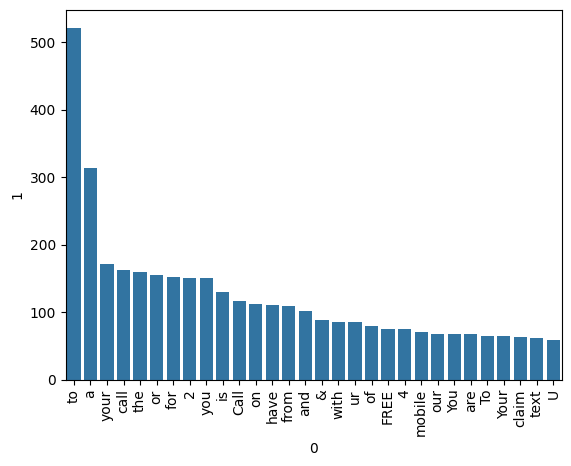

In [93]:
import seaborn as sns
from collections import Counter
spam_corpus=[]
for msg in df[df.target==1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

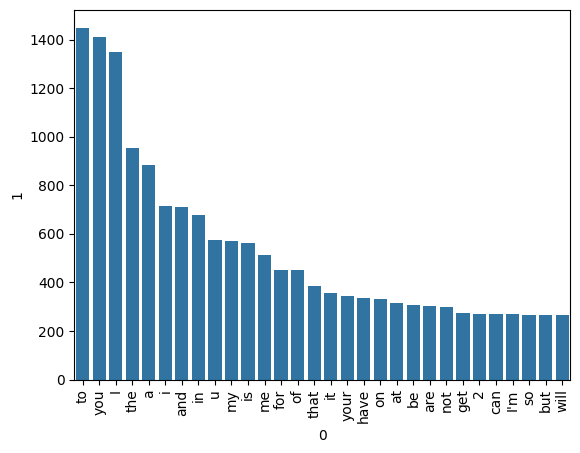

In [95]:
ham_corpus=[]
for msg in df[df.target==0]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [96]:
df.to_csv('spam_cleaned.csv',index=False)